# D2: Explore Data Set Features and Engage

**Author:** Karli Dean\
**Date:** October 29,2025\
**Description:** This is a Jupyter Notebook that will analyze the data set I had chosen on Kaggle. The data set is a study on the video game Fortnite, and if the influence of drugs helps or hurts the player's performance. The data set can be found [here](https://www.kaggle.com/datasets/thedevastator/unlocking-fortnite-player-performance-with-88-ga).

## Section 1: Imports

In any good data analysis, we have to first place our imports. Our entire Jupyter notebook will be running off of this comprehensive list of imported tools. If you run into a spot where you need another import, please place it in this code.

In [84]:
# Importing pandas
# Import matplotlib for creating static visualizations

# Importing numpy
import pandas as pd

# Import seaborn for statistical data visualization (built on matplotlib)

Now we can import our dataset.

In [85]:
# Importing the data set using pandas
fortnite = pd.read_csv("data/fortnite_statistics.csv")

## Section 2: Initial Statistics

We have to now verify the pandas read worked in our dataset and grab general statistics on the data. "General Statistics" is the term I am using for the mean, median, mode, range, quartiles, and how many instances are blank.

In [86]:
# Verifying the reading of the CSV worked
fortnite.head()

,index,Date,Time of Day,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,0,10-Apr,18:00,27,sober,2,0,0,0.23,14,2,271.08,20,20,272,331,621
1,1,10-Apr,18:00,45,sober,1,2,0,0.30,19,1,396.73,123,30,247,444,998
2,2,10-Apr,18:00,38,high,3,0,0,0.30,32,1,607.80,71,60,176,322,1109
3,3,10-Apr,19:00,30,high,1,3,0,0.18,19,1,714.16,244,10,238,330,4726
4,4,10-Apr,19:00,16,high,3,1,1,0.58,42,18,1140.00,584,150,365,668,2070


In [87]:
fortnite.describe()

,index,Placed,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.00000
mean,43.000000,22.045977,2.517241,1.482759,0.402299,0.260115,29.735632,4.747126,1137.146322,386.574713,122.712644,244.172414,581.770115,3170.91954
std,25.258662,13.145791,1.885453,1.388173,0.738631,0.134713,22.093596,5.777298,1110.843642,569.978062,225.170370,124.937399,354.172396,3458.54107
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.040000,1.000000,0.000000,17.860000,0.000000,0.000000,19.000000,60.000000,175.00000
25%,21.500000,15.000000,1.000000,0.000000,0.000000,0.170000,12.000000,1.000000,398.280000,75.000000,20.000000,154.000000,328.500000,1094.00000
50%,43.000000,21.000000,2.000000,1.000000,0.000000,0.250000,27.000000,3.000000,638.170000,164.000000,50.000000,209.000000,481.000000,2029.00000
75%,64.500000,28.500000,3.000000,2.000000,1.000000,0.320000,38.000000,6.500000,1575.000000,418.500000,145.000000,316.500000,750.000000,3707.00000
max,86.000000,66.000000,8.000000,6.000000,4.000000,0.900000,105.000000,33.000000,4460.000000,3002.000000,1740.000000,677.000000,1507.000000,18026.00000


In [88]:
fortnite.isnull().sum()

index                   0
Date                    0
Time of Day             0
Placed                  0
Mental State            0
Eliminations            0
Assists                 0
Revives                 0
Accuracy                0
Hits                    0
Head Shots              0
Distance Traveled       0
Materials Gathered      0
Materials Used          0
Damage Taken            0
Damage to Players       0
Damage to Structures    0
dtype: int64

**Findings:** Looking at our numerical data, we can see there are no missing values in this data set and the data looks to be skewed in some areas.

## Section 3: Initial Feature Transformation

In Discussion 1, we chose our selected features. I will be removing the options I did not choose in the next section of code. We will check the descriptions of the dataframe afterwards to make sure the df looks correct.

In [89]:
# Data Transformation to eliminate columns that are unneccessary to what we are trying to achieve.

fortnite.drop(
    columns={
        "index",
        "Date",
        "Time of Day",
        "Distance Traveled",
        "Materials Gathered",
        "Materials Used",
        "Damage to Structures",
    },
    inplace=True,
)

In [90]:
fortnite.describe()

,Placed,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Damage Taken,Damage to Players
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,22.045977,2.517241,1.482759,0.402299,0.260115,29.735632,4.747126,244.172414,581.770115
std,13.145791,1.885453,1.388173,0.738631,0.134713,22.093596,5.777298,124.937399,354.172396
min,1.000000,0.000000,0.000000,0.000000,0.040000,1.000000,0.000000,19.000000,60.000000
25%,15.000000,1.000000,0.000000,0.000000,0.170000,12.000000,1.000000,154.000000,328.500000
50%,21.000000,2.000000,1.000000,0.000000,0.250000,27.000000,3.000000,209.000000,481.000000
75%,28.500000,3.000000,2.000000,1.000000,0.320000,38.000000,6.500000,316.500000,750.000000
max,66.000000,8.000000,6.000000,4.000000,0.900000,105.000000,33.000000,677.000000,1507.000000


**Findings:** The column drop was successful.

# Section 4: Histograms

My next step is to evaluate histograms of the data, allowing me to see the distribution of the data. This allows me to see if something is worth my time to look at or if it only stays at 1 value. This goes for everything else other than my target, which is going to be a binary variable (sober/under the influence).\
We will use the histogram function for all data features.

array([[<Axes: title={'center': 'Placed'}>,
        <Axes: title={'center': 'Eliminations'}>,
        <Axes: title={'center': 'Assists'}>],
       [<Axes: title={'center': 'Revives'}>,
        <Axes: title={'center': 'Accuracy'}>,
        <Axes: title={'center': 'Hits'}>],
       [<Axes: title={'center': 'Head Shots'}>,
        <Axes: title={'center': 'Damage Taken'}>,
        <Axes: title={'center': 'Damage to Players'}>]], dtype=object)

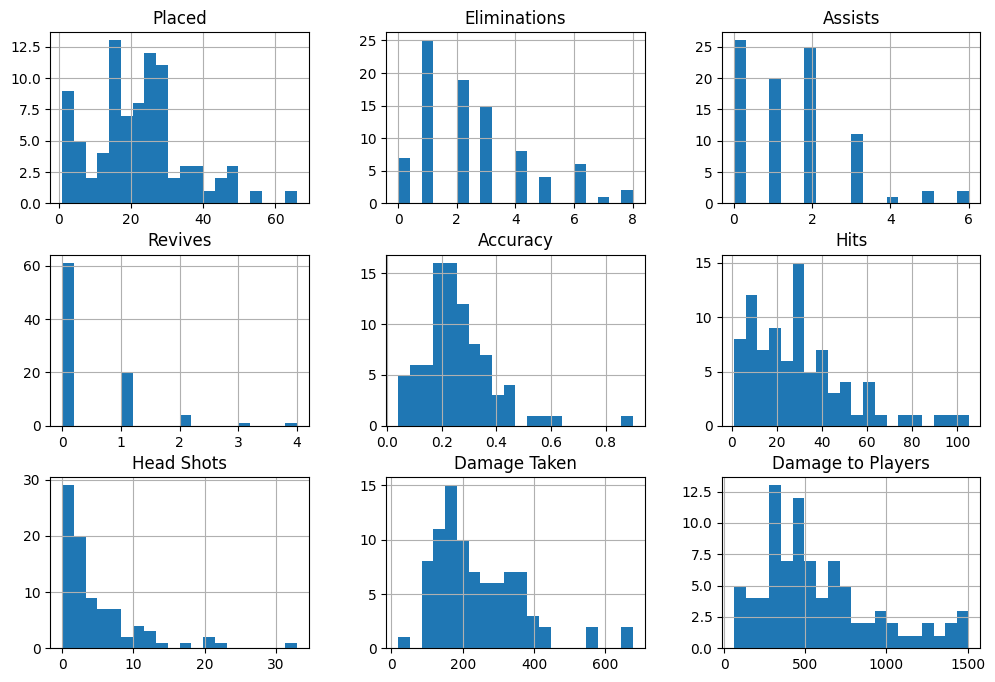

In [91]:
fortnite.hist(figsize=(12, 8), bins=20)

**Finding:** The following names describe the histograms' natures for each field:\
Placed: Normal/Skewed Distribution\
Eliminations: Skewed Distribution\
Assists: Skewed Distribution\
Revives: Skewed Distribution\
Accuracy: Skewed Distribution\
Hits: Skewed Distribution\
Headshots: Skewed Distribution\
Damage Taken: Normal/Skewed Distribution\
Damage to Players: Normal\almost BiModal Distribution

These results make sense because many people can have bad games depending on the mental state and the other people in the game lobby. If there are many people in the game lobby who are very good at the game (called "sweats"), it can be very hard to do well in this study.

In terms of further transformation, it looks like we should remove the 'Revives' column because there isn't many entries outside of 0. However, I plan on keeping this feature in due to sample size. There are under 100 entries in this data set, and I believe this could have significant impact in our model.


# Section 5: Further Transformation

In our next code section, I will be transforming the data itself, not just a column header. I will be converting the qualitative data (called 'Mental State') to be a quantitative binary target item. 

In [92]:
# Transforming categorical data into binary data (0,1)
fortnite["Mental State"] = fortnite["Mental State"].map({"sober": 0, "high": 1})

In [93]:
# Transforming all decimal data to be rounded to 2 decimals. This will not change int64's.
fortnite = fortnite.round(2)

In [96]:
# Checking to make sure the transformations loaded correctly

fortnite.head(10)

,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Damage Taken,Damage to Players
0,27,0,2,0,0,0.23,14,2,272,331
1,45,0,1,2,0,0.30,19,1,247,444
2,38,1,3,0,0,0.30,32,1,176,322
3,30,1,1,3,0,0.18,19,1,238,330
4,16,1,3,1,1,0.58,42,18,365,668
5,30,1,0,1,0,0.10,3,1,146,117
6,20,1,3,3,0,0.25,41,6,175,634
7,29,1,2,2,0,0.25,17,4,219,412
8,21,1,4,0,1,0.39,50,14,196,989
9,24,1,1,2,0,0.35,30,1,150,422


array([[<Axes: title={'center': 'Mental State'}>]], dtype=object)

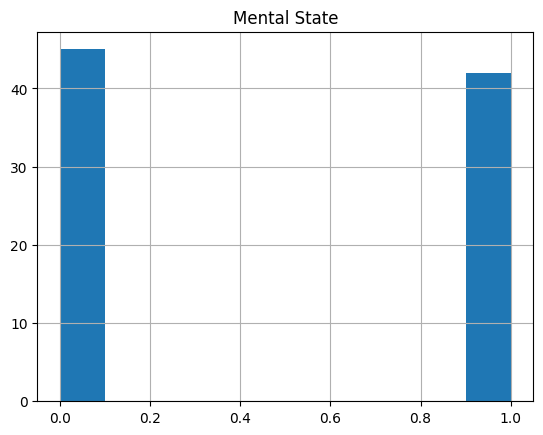

In [95]:
# Running a histogram to confirm the change was to binary digits, not categorical.
fortnite.hist("Mental State")

**Finding:** This data is pretty uniform, but there are only 2 values it can be. We can tell that there are more sober instances than those under the influence.